In [48]:
import pandas as pd
import pyautogui
import pyperclip
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
pyautogui.alert("Vamos começar, aperte OK")
pyautogui.hotkey('ctrl', 't')
link = "https://drive.google.com/drive/folders/1e73RyDf89Oahkgd-gu6BQPlPosgguCPc"
pyperclip.copy(link)
pyautogui.hotkey('ctrl', 'v')
pyautogui.press("enter")
time.sleep(3)
pyautogui.click(x=627, y=376, clicks=1)
time.sleep(1)
pyautogui.click(x=1669, y=198, clicks=1)
time.sleep(1)
pyautogui.click(x=1530, y=625, clicks=1)
time.sleep(4)
pyautogui.press("enter")

In [11]:
# Código para descobrir a posição do cursor na tela
time.sleep(5)
pyautogui.position()

Point(x=1530, y=625)

In [64]:
# Carregando o dataset e exibindo na tela

tabela = pd.read_csv("C:/Users/diogo/Documents/BasesDeDadosCsv/dataset-brasileirao-2003-2019.csv", sep = ';')
display(tabela)

,year,position,team,points,games,victories,draws,losses,goals_scored,goals_against,goals_difference,perc_points_won
0,2003,1,Cruzeiro,100,46,31,7,8,102,47,55,72
1,2003,2,Santos,87,46,25,12,9,93,60,33,63
2,2003,3,São Paulo,78,46,22,12,12,81,67,14,56
3,2003,4,São Caetano,74,46,19,14,13,53,37,16,53
4,2003,5,Coritiba,73,46,21,10,15,67,58,9,52
...,...,...,...,...,...,...,...,...,...,...,...,...
345,2019,16,Ceará,39,38,10,9,19,36,41,–5,34
346,2019,17,Cruzeiro,36,38,7,15,16,27,46,–19,31
347,2019,18,CSA,32,38,8,8,22,24,58,–34,28
348,2019,19,Chapecoense,32,38,7,11,20,31,52,–21,28


In [274]:
# Calculando alguns indicadores

gols_marcados_total = tabela["goals_scored"].sum()

maior_numero_gols_edicao = tabela["goals_scored"].max()

top_3_maiores_marcadores = tabela.groupby('team')['goals_scored'].max().sort_values(ascending=False).head(3)

print("O número máximo de gols marcado por um time em uma única edição foi de: ", maior_numero_gols_edicao)
print("O número total de gols marcados no Brasileirão de 2003 a 2019 foi: ", gols_marcados_total)

print("\n Top 3 máximo de gols em uma única edição: \n")
print(top_3_maiores_marcadores)

O número máximo de gols marcado por um time em uma única edição foi de:  103
O número total de gols marcados no Brasileirão de 2003 a 2019 foi:  17950

 Top 3 máximo de gols em uma única edição: 

team
 Santos                 103
 Cruzeiro               102
 Atlético Paranaense     93
Name: goals_scored, dtype: int64


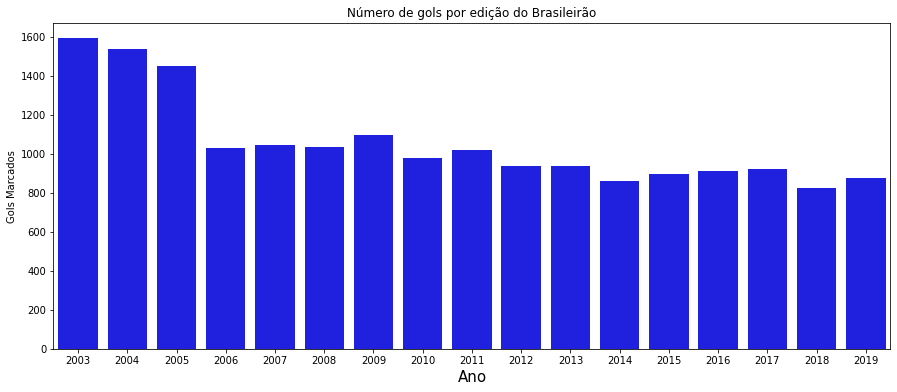

In [275]:
# Gerando um bar plot para o número de gols por edição

gols_por_edicao  = tabela.groupby('year')['goals_scored'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15,6))
sns.barplot(x="year", y="goals_scored", data=gols_por_edicao, color='blue')
plt.title('Número de gols por edição do Brasileirão')
plt.xlabel('Ano', fontsize = 15) # Eixo X
plt.ylabel('Gols Marcados')
plt.show()

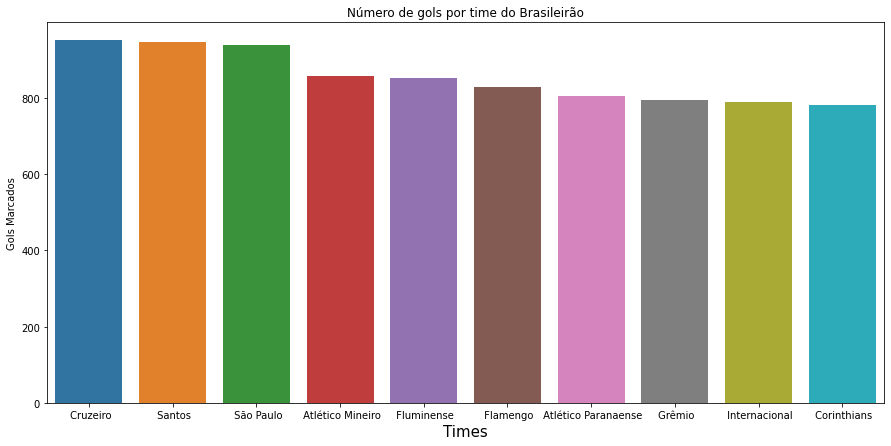

In [276]:
# Gerando um bar plot para o top 10 número de gols por time

gols_por_time  = tabela.groupby('team')['goals_scored'].sum().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(15,7))
sns.barplot(x="team", y="goals_scored", data=gols_por_time)
plt.title('Número de gols por time do Brasileirão')
plt.xlabel('Times', fontsize = 15)
plt.ylabel('Gols Marcados')
plt.show()